In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import glob
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import sklearn

In [3]:
df = pd.read_csv('~/Downloads/classifications_2020_10_21_aggregated.csv')

In [56]:
df.columns.values

array(['iauname', 'smooth-or-featured_artifact',
       'smooth-or-featured_featured-or-disk', 'smooth-or-featured_smooth',
       'how-rounded_cigar-shaped', 'how-rounded_in-between',
       'how-rounded_round', 'disk-edge-on_no', 'disk-edge-on_yes',
       'edge-on-bulge_boxy', 'edge-on-bulge_none',
       'edge-on-bulge_rounded', 'bar_no', 'bar_weak', 'bar_strong',
       'has-spiral-arms_no', 'has-spiral-arms_yes',
       'spiral-winding_loose', 'spiral-winding_medium',
       'spiral-winding_tight', 'spiral-arm-count_1', 'spiral-arm-count_2',
       'spiral-arm-count_3', 'spiral-arm-count_4',
       'spiral-arm-count_cant-tell', 'spiral-arm-count_more-than-4',
       'bulge-size_none', 'bulge-size_small', 'bulge-size_moderate',
       'bulge-size_large', 'bulge-size_dominant', 'merging_none',
       'merging_minor-disturbance', 'merging_major-disturbance',
       'merging_merger', 'ra', 'dec', 'redshift', 'subject_id',
       'smooth-or-featured_total-votes', 'how-rounded_total-vo

In [9]:
df['smooth-or-featured_total-votes'].min()  # only includes galaxies with at least 1 vote

1.0

Text(0, 0.5, 'Count')

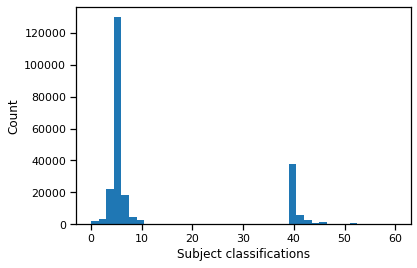

In [4]:
# plt.hist(by_galaxy['classification_id'], range=[0, 60], bins=40)
plt.hist(df['smooth-or-featured_total-votes'], range=[0, 60], bins=40)
plt.xlabel('Subject classifications')
plt.ylabel('Count')

In [8]:
remaining = np.max([5 - df['smooth-or-featured_total-votes'], np.zeros(len(df))], axis=0)
remaining

array([0., 0., 0., ..., 4., 4., 4.])

In [10]:
remaining.sum()

47951.0

(array([216511.,  14933.,   6917.,   3424.,   2228.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

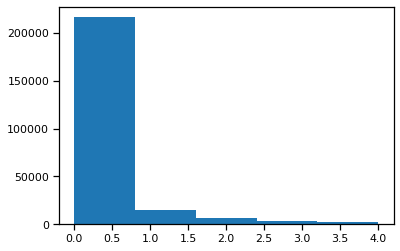

In [11]:
plt.hist(remaining, bins=5)

In [12]:
pd.value_counts(remaining)

0.0    216511
1.0     14933
2.0      6917
3.0      3424
4.0      2228
dtype: int64

In [ ]:
## Let's specifically check for the missing galaxy sets, which may not have been classified yet

In [34]:
missing_iaunames_loc = '/home/walml/repos/gz-scripts/missing_dr5_2020_07_20_iaunames.json'  # iaunames in missing_decals_dr5_subjects
with open(missing_iaunames_loc, 'r') as f:
    iaunames_part_a = json.load(f)['iaunames']

In [35]:
len(iaunames_part_a)

21900

In [36]:
df['iauname'].isin(iaunames_part_a).sum()  # all but 500 have recieved some classification, so this set is already included in remaining, above

21401

In [31]:
missing_iaunames_loc = '/home/walml/repos/gz-scripts/missing_decals_dr5_subjects_d_iaunames.json'  # iaunames in missing_decals_dr5_subjects
with open(missing_iaunames_loc, 'r') as f:
    iaunames_part_d = json.load(f)['iaunames']

In [32]:
len(iaunames_part_d)

11456

In [33]:
df['iauname'].isin(iaunames_part_d).sum()  # all but 500 have recieved some classification, so this set is already included in remaining, above

2382

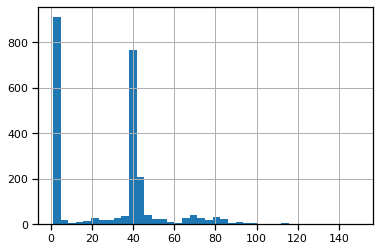

In [40]:
df[df['iauname'].isin(iaunames_part_d)]['smooth-or-featured_total-votes'].hist(bins=40)

In [44]:
df['iauname'].isin(missing_iaunames).sum() 

0

In [41]:
missing_galaxies = pd.read_csv('/home/walml/repos/zoobot/dr5_missing_galaxies_2020_10_21.csv')
# missing_iaunames = list(missing_galaxies['iauname'])
missing_galaxies

,iauname,nsa_id,ra,dec,petrotheta,petroth50,petroth90,fits_loc,png_loc,fits_ready,fits_filled,png_ready,relative_png_loc,redshift,nsa_version
0,J152824.24-002951.3,16333,232.101003,-0.497560,11.394722,5.300970,12.203951,/Volumes/EXTERNAL/decals/fits/dr5/J152/J152824...,/Volumes/EXTERNAL/decals/png/dr5/J152/J152824....,True,True,True,J152/J152824.24-002951.3.png,0.057843,1_0_0
1,J120208.92-030136.9,18671,180.537134,-3.026832,31.546130,17.297550,46.023430,/Volumes/EXTERNAL/decals/fits/dr5/J120/J120208...,/Volumes/EXTERNAL/decals/png/dr5/J120/J120208....,True,True,True,J120/J120208.92-030136.9.png,0.052493,1_0_0
2,J153221.48+003021.5,26956,233.089534,0.505969,8.704482,3.753158,12.340964,/Volumes/EXTERNAL/decals/fits/dr5/J153/J153221...,/Volumes/EXTERNAL/decals/png/dr5/J153/J153221....,True,True,True,J153/J153221.48+003021.5.png,0.086825,1_0_0
3,J162220.24-003525.5,27167,245.584363,-0.590422,7.437321,3.518912,7.995928,/Volumes/EXTERNAL/decals/fits/dr5/J162/J162220...,/Volumes/EXTERNAL/decals/png/dr5/J162/J162220....,True,True,True,J162/J162220.24-003525.5.png,0.044573,1_0_0
4,J163058.78+001620.0,27270,247.744970,0.272281,9.324070,4.247065,9.624050,/Volumes/EXTERNAL/decals/fits/dr5/J163/J163058...,/Volumes/EXTERNAL/decals/png/dr5/J163/J163058....,True,True,True,J163/J163058.78+001620.0.png,0.113730,1_0_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29132,J142431.49-003142.4,698428,216.131200,-0.528175,5.513321,2.764185,5.407866,/Volumes/EXTERNAL/decals/fits/dr5/J142/J142431...,/Volumes/EXTERNAL/decals/png/dr5/J142/J142431....,True,True,True,J142/J142431.49-003142.4.png,0.072400,1_0_0
29133,J144321.99-003753.1,698496,220.841699,-0.631355,4.146680,1.851529,5.675371,/Volumes/EXTERNAL/decals/fits/dr5/J144/J144321...,/Volumes/EXTERNAL/decals/png/dr5/J144/J144321....,True,True,True,J144/J144321.99-003753.1.png,0.149900,1_0_0
29134,J143619.83-010748.1,698522,219.083613,-1.130237,18.740425,7.763114,25.235826,/Volumes/EXTERNAL/decals/fits/dr5/J143/J143619...,/Volumes/EXTERNAL/decals/png/dr5/J143/J143619....,True,True,True,J143/J143619.83-010748.1.png,0.105971,1_0_0
29135,J144612.39-014833.1,698548,221.550819,-1.814557,4.897500,2.093886,7.086283,/Volumes/EXTERNAL/decals/fits/dr5/J144/J144612...,/Volumes/EXTERNAL/decals/png/dr5/J144/J144612....,True,True,True,J144/J144612.39-014833.1.png,0.080386,1_0_0


In [45]:
missing_iaunames = missing_galaxies['iauname']

In [55]:
df['iauname'].isin(missing_iaunames).sum() 

19564

In [47]:
missing_but_in_export = df[df['iauname'].isin(missing_iaunames)]

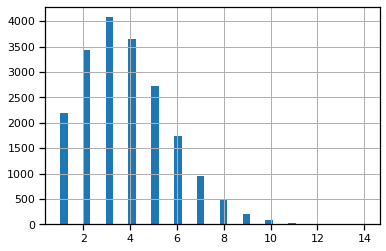

In [49]:
missing_but_in_export['smooth-or-featured_total-votes'].hist(bins=40)  # these are all already counted

In [53]:
missing_and_not_in_export = set(missing_iaunames) - set(df['iauname'])
len(missing_and_not_in_export)  # these all need 5 classifications

9573

In [54]:
47951 + (5*9573)  # classifications for uploaded but less than 5, plus 10k with no classifications yet

95816